In [1]:
import boto3
import awswrangler as wr
import pandas as pd
accessKeys = pd.read_csv("../../quant-bears_accessKeys.csv")
session = boto3.Session(
	aws_access_key_id=accessKeys.loc[0, "Access key ID"],
	aws_secret_access_key=accessKeys.loc[0, "Secret access key"]
)

s3_collection_path = "s3://quant-bears-data-collection/raw-data/"
s3_price_collection_path = "s3://quant-bears-data-collection/raw-resolved-price/"

In [2]:
today = "2023-10-05"
previousDay = "2023-09-28"

In [3]:
df_alpha = wr.s3.read_parquet(s3_collection_path + f"seekingAlpha.seekingAlphaBulkMetrics/{previousDay}.parquet", boto3_session=session)
df_guru = wr.s3.read_parquet(s3_collection_path + f"gurufocus/{previousDay}.parquet", boto3_session=session)

In [4]:
resolved_price = wr.s3.read_parquet(s3_price_collection_path + f"{today}.parquet", boto3_session=session)

In [5]:
resolved_price = resolved_price.set_index("ticker")

In [14]:
df_alpha = df_alpha.set_index("ticker")
df_guru = df_guru.set_index("ticker")
joined_df = pd.concat([df_alpha, df_guru], axis = 1)
joined_df.head()

,altman_z_score,analysts_down,analysts_down_percent,analysts_down_percent_avg_5y,analysts_up,analysts_up_percent,analysts_up_percent_avg_5y,assets_turnover,assets_turnover_avg_5y,authors_count,...,Price-to-Graham-Number,Earnings_Yield__Greenblatt__%,Forward_Rate_of_Return__Yacktman__%,sector,area,Price-to-DCF__Earnings_Based_,Price-to-DCF__FCF_Based_,Price-to-Net-Current-Asset-Value,Price-to-Net-Cash,Price-to-FFO
ticker,,,,,,,,,,,,,,,,,,,,,
A,6.153144,15.0,100.000000,12.759212,0.0,0.000000,87.240790,0.661089,0.601508,4.0,...,6.31,4.35,17.97,Healthcare,Medical Diagnostics & Research,NaN,NaN,NaN,NaN,NaN
AA,1.401235,7.0,100.000000,60.404625,0.0,0.000000,39.595375,0.728491,0.757975,2.0,...,NaN,-20.83,-1.42,Basic Materials,Metals & Mining,NaN,NaN,NaN,NaN,NaN
AAL,0.862385,9.0,52.941177,53.991806,8.0,47.058823,46.008194,0.782322,0.599356,7.0,...,NaN,14.37,-27.34,Industrials,Transportation,NaN,NaN,NaN,NaN,NaN
AAP,2.266178,15.0,100.000000,39.274876,0.0,0.000000,60.725124,0.917976,0.929945,8.0,...,1.11,7.42,20.41,Consumer Cyclical,Retail - Cyclical,0.83,NaN,NaN,NaN,NaN
AAPL,7.639575,8.0,22.222221,23.935060,28.0,77.777780,76.064940,1.143769,0.929182,36.0,...,7.52,4.25,21.30,Technology,Hardware,1.29,1.27,NaN,NaN,NaN


In [15]:
joined_df.shape

(1570, 333)

In [16]:
nan_percentage = joined_df.isna().sum() / joined_df.shape[0]

<Axes: >

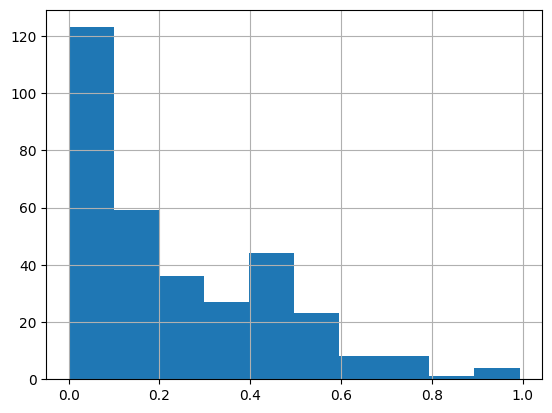

In [17]:
nan_percentage.hist()

In [18]:
nan_percentage.sort_values(ascending = True).head(100).tail(50)

price_close_adj_ytd                        0.013376
momentum_9m                                0.013376
price_return_9m                            0.013376
price_close_ytd                            0.013376
authors_count                              0.016561
momentum_12m                               0.017197
beta24                                     0.017197
price_close_adj_1y                         0.017834
price_return_1y                            0.017834
price_close_1y                             0.017834
total_revenue                              0.019108
analysts_down                              0.019108
revenue_per_share                          0.019108
net_margin                                 0.019108
analysts_up                                0.019108
12-1_Month_Momentum_%                      0.019108
Shareholder_Yield_%                        0.019745
EV-to-Revenue                              0.019745
gross_profit                               0.020382
ps_ratio_fy1

In [19]:
resolved_update = (resolved_price["primary_price"] - joined_df["primary_price"]) / joined_df["primary_price"]

<Axes: >

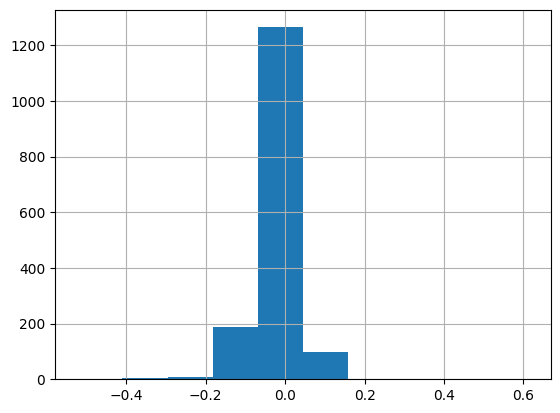

In [20]:
resolved_update.hist()

In [21]:
joined_df["target"] = resolved_update

In [22]:
sectors = pd.get_dummies(joined_df["sector"]).astype("float").add_prefix("sector_")

In [23]:
full_df = pd.concat([joined_df, sectors], axis = 1)
full_df.head()

,altman_z_score,analysts_down,analysts_down_percent,analysts_down_percent_avg_5y,analysts_up,analysts_up_percent,analysts_up_percent_avg_5y,assets_turnover,assets_turnover_avg_5y,authors_count,...,sector_Communication Services,sector_Consumer Cyclical,sector_Consumer Defensive,sector_Energy,sector_Financial Services,sector_Healthcare,sector_Industrials,sector_Real Estate,sector_Technology,sector_Utilities
ticker,,,,,,,,,,,,,,,,,,,,,
A,6.153144,15.0,100.000000,12.759212,0.0,0.000000,87.240790,0.661089,0.601508,4.0,...,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0
AA,1.401235,7.0,100.000000,60.404625,0.0,0.000000,39.595375,0.728491,0.757975,2.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
AAL,0.862385,9.0,52.941177,53.991806,8.0,47.058823,46.008194,0.782322,0.599356,7.0,...,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0
AAP,2.266178,15.0,100.000000,39.274876,0.0,0.000000,60.725124,0.917976,0.929945,8.0,...,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
AAPL,7.639575,8.0,22.222221,23.935060,28.0,77.777780,76.064940,1.143769,0.929182,36.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0


In [24]:
float_df = full_df.select_dtypes(float)
float_df.head()

,altman_z_score,analysts_down,analysts_down_percent,analysts_down_percent_avg_5y,analysts_up,analysts_up_percent,analysts_up_percent_avg_5y,assets_turnover,assets_turnover_avg_5y,authors_count,...,sector_Communication Services,sector_Consumer Cyclical,sector_Consumer Defensive,sector_Energy,sector_Financial Services,sector_Healthcare,sector_Industrials,sector_Real Estate,sector_Technology,sector_Utilities
ticker,,,,,,,,,,,,,,,,,,,,,
A,6.153144,15.0,100.000000,12.759212,0.0,0.000000,87.240790,0.661089,0.601508,4.0,...,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0
AA,1.401235,7.0,100.000000,60.404625,0.0,0.000000,39.595375,0.728491,0.757975,2.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
AAL,0.862385,9.0,52.941177,53.991806,8.0,47.058823,46.008194,0.782322,0.599356,7.0,...,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0
AAP,2.266178,15.0,100.000000,39.274876,0.0,0.000000,60.725124,0.917976,0.929945,8.0,...,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
AAPL,7.639575,8.0,22.222221,23.935060,28.0,77.777780,76.064940,1.143769,0.929182,36.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0


In [25]:
corr_df = float_df.corr()

<Axes: >

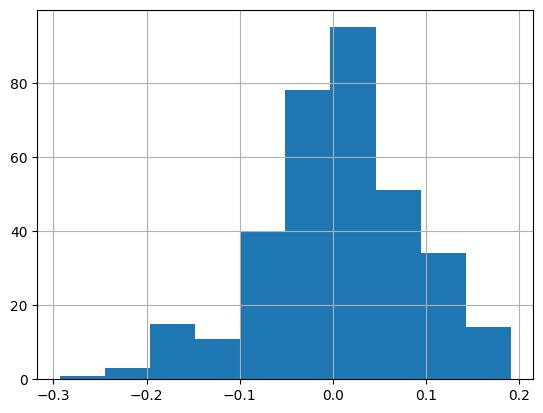

In [26]:
corr_df["target"].sort_values().head(342).hist()

In [27]:
def plot_corr(df,size=10):
    '''Plot a graphical correlation matrix for a dataframe.

    Input:
        df: pandas DataFrame
        size: vertical and horizontal size of the plot'''
    
    %matplotlib inline
    import matplotlib.pyplot as plt

    # Compute the correlation matrix for the received dataframe
    corr = df.corr()
    
    # Plot the correlation matrix
    fig, ax = plt.subplots(figsize=(size, size))
    cax = ax.matshow(corr, cmap='RdYlGn')
    # plt.xticks(range(len(corr.columns)), corr.columns, rotation=90);
    # plt.yticks(range(len(corr.columns)), corr.columns);
    
    # Add the colorbar legend
    cbar = fig.colorbar(cax, ticks=[-1, 0, 1], aspect=40, shrink=.8)
    return fig

In [28]:
import scipy
import numpy as np
import scipy.cluster.hierarchy as sch

float_df = float_df.fillna(0.)

X = float_df.corr().values
d = sch.distance.pdist(X)   # vector of ('55' choose 2) pairwise distances
L = sch.linkage(d, method='complete')
ind = sch.fcluster(L, 0.5*d.max(), 'distance')
columns = [float_df.columns.tolist()[i] for i in list((np.argsort(ind)))]
float_df = float_df.reindex(columns = columns)

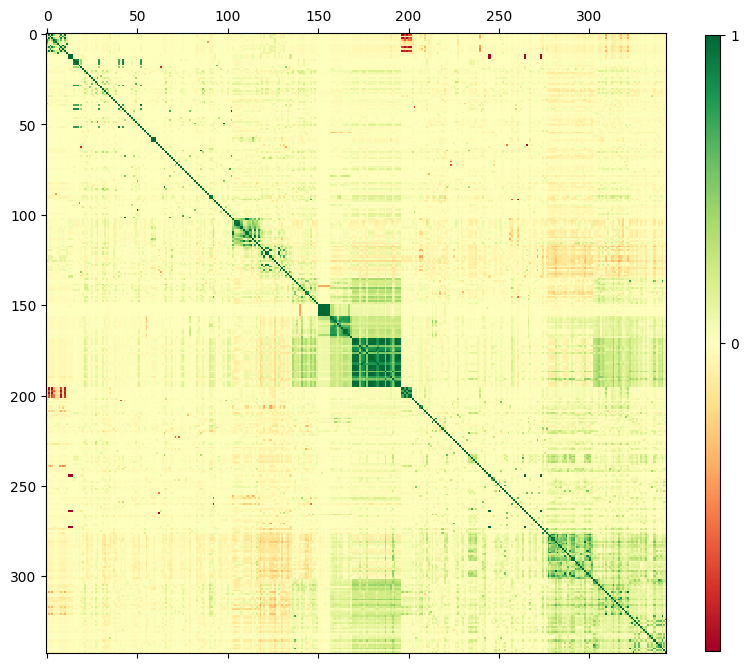

In [29]:
plot_corr(float_df)
pass

In [30]:
corr_df = float_df.corr()

In [31]:
from tqdm import tqdm

In [32]:
cols_to_remove = set()
corr_threshold = .95

for col in tqdm(float_df.columns):
	if col in cols_to_remove:
		continue
	exceeded_values = corr_df.columns[(corr_df.loc[col] > corr_threshold)]
	if exceeded_values.shape[0] > 1:
		new_cols = set(exceeded_values.tolist())
		new_cols.remove(col)
		cols_to_remove = cols_to_remove.union(new_cols)

100%|██████████| 343/343 [00:00<00:00, 27357.45it/s]


In [33]:
len(cols_to_remove)

57

In [34]:
cols_to_remove

{'9-Day_RSI',
 'EV-to-Revenue',
 'Net_Margin_%',
 'PB_Ratio',
 'PE_Ratio_without_NRI',
 'Price-to-Operating-Cash-Flow',
 'Quick_Ratio',
 'ROA_%',
 'capex_to_sales_avg_5y',
 'cash_per_share',
 'close',
 'diluted_eps',
 'dividend_yield_avg_5y',
 'earnings_yield_avg_5y',
 'ebit_margin',
 'ebit_margin_avg_5y',
 'ebitda_margin',
 'ev_ebit_avg_5y',
 'ev_sales_fy1_avg_5y',
 'last_div_date',
 'last_price_vs_sma_100d',
 'last_price_vs_sma_200d',
 'levered_fcf_margin_avg_5y',
 'marketcap',
 'marketcap_display',
 'momentum_12m',
 'momentum_9m_avg_5y',
 'net_margin',
 'net_margin_avg_5y',
 'p_week_vol_shares',
 'price_close_10y',
 'price_close_1m',
 'price_close_1w',
 'price_close_1y',
 'price_close_3y',
 'price_close_5y',
 'price_close_6m',
 'price_close_adj_1m',
 'price_close_adj_1w',
 'price_close_adj_1y',
 'price_close_adj_6m',
 'price_close_adj_ytd',
 'price_high_52w',
 'price_low_52w',
 'price_return_3m',
 'price_return_6m',
 'price_return_9m',
 'primary_price',
 'ps_ratio',
 'ps_ratio_fy1',

In [26]:
cleared_df = float_df.drop(cols_to_remove, axis = 1)

In [27]:
cleared_df.shape

(1570, 286)

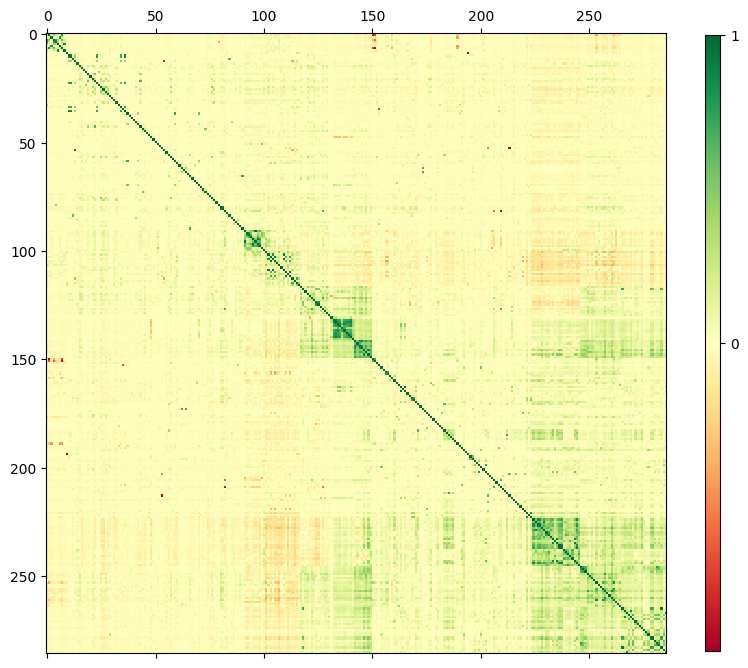

In [28]:
plot_corr(cleared_df)
pass

In [29]:
result = cleared_df.corr()["target"]

<Axes: >

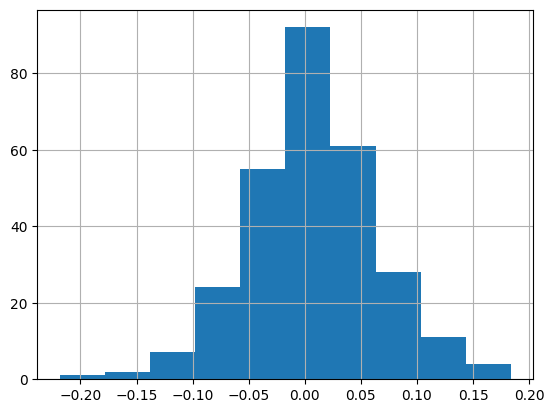

In [30]:
result.sort_values().head(285).hist()

In [31]:
from sklearn.feature_selection import f_regression, mutual_info_regression

In [32]:
X_ = float_df.drop("target", axis = 1)
f_results = f_regression(X_, float_df["target"])

In [33]:
f_results = pd.DataFrame(f_results, index=["F statistic", "p-value"]).T
f_results["column_name"] = X_.columns

In [34]:
alpha = 0.05
null_rejected = f_results[f_results["p-value"] <= alpha]
null_rejected.head()

,F statistic,p-value,column_name
1,5.078079,0.024368,ev_12m_sales_ratio
2,11.461600,0.000728,EV-to-Forward-Revenue
3,5.657747,0.017498,EV-to-Revenue
7,9.911982,0.001673,ev_sales_fy1
8,7.384098,0.006653,PS_Ratio


In [35]:
null_rejected.shape

(137, 3)

In [36]:
full_df.shape

(1570, 345)

In [37]:
import scipy.stats as stats

In [38]:
alpha = 0.05
degree_freedom_numerator = 1
degree_freedom_denominator = 1568

critical_f = stats.f.ppf(1 - alpha, degree_freedom_numerator, degree_freedom_denominator)
critical_f

3.8473961848943583

In [39]:
null_rejected[null_rejected["F statistic"] > critical_f]

,F statistic,p-value,column_name
1,5.078079,2.436787e-02,ev_12m_sales_ratio
2,11.461600,7.280357e-04,EV-to-Forward-Revenue
3,5.657747,1.749759e-02,EV-to-Revenue
7,9.911982,1.672997e-03,ev_sales_fy1
8,7.384098,6.652715e-03,PS_Ratio
...,...,...,...
313,30.432442,4.037635e-08,return_on_total_capital_avg_5y
315,6.646361,1.002640e-02,Years_of_Profitability_over_Past_10-Year
318,4.449578,3.506802e-02,3-Year_Average_Share_Buyback_Ratio
320,7.103567,7.772028e-03,ROA_%


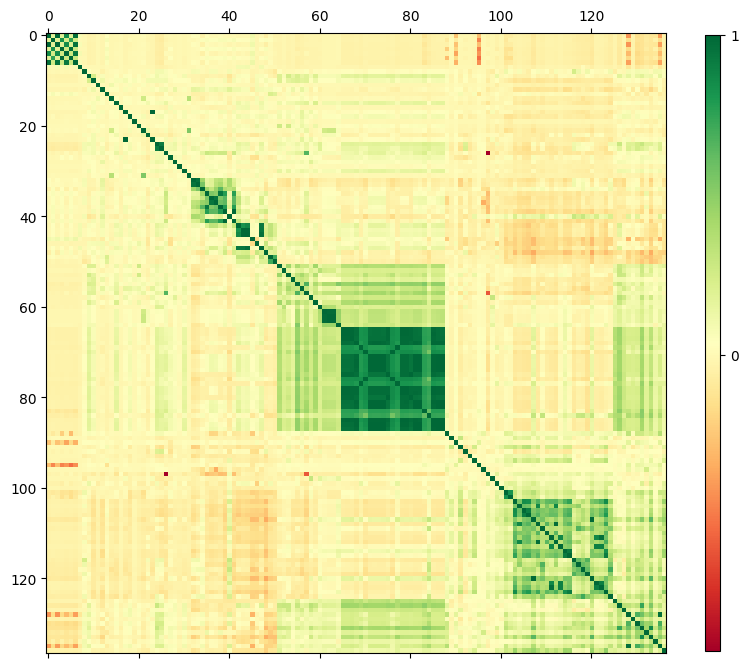

In [40]:
plot_corr(float_df[null_rejected[null_rejected["F statistic"] > critical_f]["column_name"]])
pass

In [37]:
X_ = float_df.drop("target", axis = 1)
mi = mutual_info_regression(X_, float_df["target"])

In [38]:
mi_df = pd.DataFrame([mi, X_.columns], index = ["mutual_info", "column_names"]).T

<Axes: >

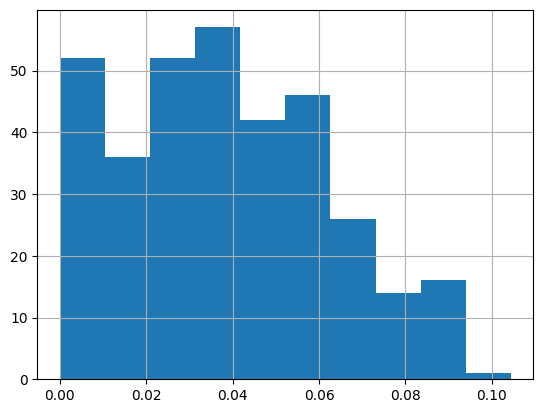

In [39]:
mi_df["mutual_info"].hist()

In [40]:
mi_df[mi_df["mutual_info"] > 0.0].sort_values(by="mutual_info", ascending = False).head(10)

,mutual_info,column_names
315,0.10439,Years_of_Profitability_over_Past_10-Year
297,0.093328,yld_on_cost_3y
98,0.093034,Price-to-Free-Cash-Flow
96,0.091253,Price-to-Owner-Earnings
312,0.09087,profitability_rank
278,0.089222,Forward_Dividend_Yield_%
232,0.08917,div_payout_gaap
279,0.08819,div_yield_fwd
277,0.087904,Dividend_Yield_%
190,0.087834,div_rate_ttm


In [41]:
mi_df[mi_df["mutual_info"] == 0.0]

,mutual_info,column_names
2,0.0,EV-to-Forward-Revenue
6,0.0,Days_Inventory
18,0.0,ev_ebit
30,0.0,ebitda_yoy
37,0.0,3-Year_Book_Growth_Rate
58,0.0,last_price_vs_sma_50d
78,0.0,diluted_eps_growth_avg_5y
83,0.0,sector_Communication Services
128,0.0,current_ratio
140,0.0,tot_analysts_recommendations


<Axes: >

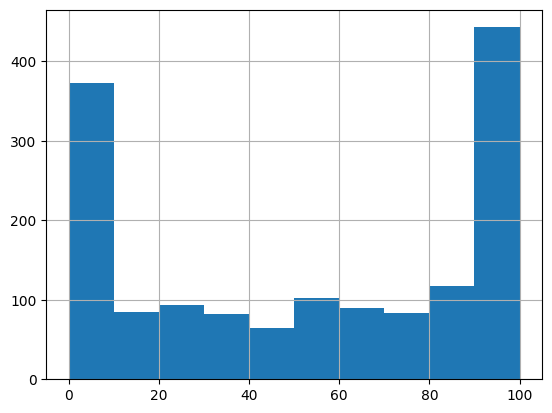

In [42]:
full_df["analysts_up_percent"].hist()

<Axes: >

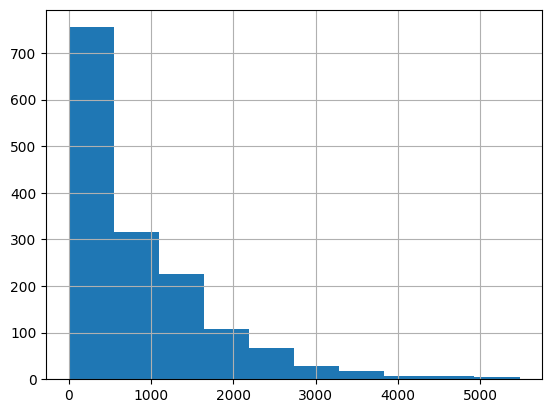

In [43]:
(full_df["tot_analysts_recommendations"] * full_df["analysts_up_percent"]).hist()

<Axes: >

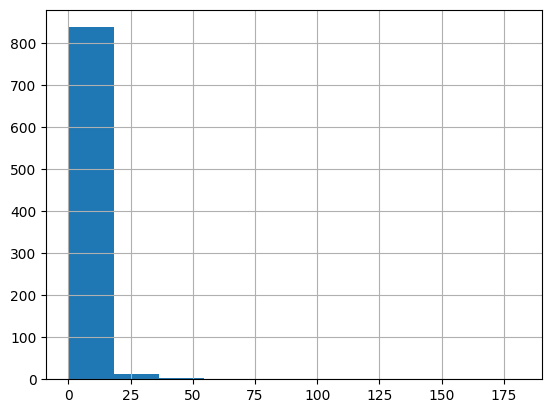

In [44]:
# full_df["Years_of_Profitability_over_Past_10-Year"].hist()
# full_df["profitability_rank"].hist()
full_df["yld_on_cost_3y"].hist()

In [45]:
cleared_df_w_na = full_df.drop(cols_to_remove, axis = 1)

In [46]:
(cleared_df_w_na.isna().sum() / cleared_df_w_na.shape[0]).sort_values(ascending = False).head(50)

peg_gaap_avg_5y                            0.992994
Price-to-FFO                               0.938217
cf_payout_avg_5y                           0.934395
impliedmarketcap                           0.926752
Price-to-Net-Cash                          0.887261
Price-to-Net-Current-Asset-Value           0.792357
Price-to-DCF__FCF_Based_                   0.788535
Price-to-DCF__Earnings_Based_              0.778344
fcf_yield_div_yield_avg_5y                 0.759873
cf_payout                                  0.753503
peg_nongaap_fy1_avg_5y                     0.753503
net_asset_to_pension_liabilities_annual    0.733758
fcf_yield_fy1_avg_5y                       0.724204
Price-to-Peter-Lynch-Fair-Value            0.662420
div_coverage_ratio_fy1_avg_5y              0.654140
price_cf_ratio_fy1_avg_5y                  0.650955
pe_ratio_avg_5y                            0.647771
peg_gaap                                   0.643312
fcf_yield_avg_5y                           0.636306
pe_gaap_fy1_

In [47]:
full_df["div_safety_category"]

A       0.394381
AA     -0.070531
AAL          NaN
AAP    -0.938766
AAPL    0.331645
          ...   
ZS           NaN
ZTO          NaN
ZTS     0.510774
ZUO          NaN
ZWS     0.120800
Name: div_safety_category, Length: 1570, dtype: float64